# UN human rights treaty data exploratory analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit
sns.set_style("darkgrid")

## RQ / Hypothesis

H: (h1) Religion (as a proxy for culture), (h2) years of democracy and (h3) HDI impact:
* a) The speed of ratification measured in days counted from the opening of the treaty
* b) Likelyhood of ratification

Note: likelyhood of ratification is not a great indicator because it is poor in information. In most cases almost all states ratify and we only get two signals 0 and 1. Time to ratification will give me a different speed for each state. However the significance of low speed is questionable. What can be said about a state that is slow to ratify but still ratifies? 

In [4]:
df = pd.read_csv("C:/Users/gusta/Documents/Datasets/dfall.csv")
df.drop(df.columns.to_list()[0],axis=1,inplace=True)
df.set_index('Country',inplace=True)
# years_d is years of uninterrupted democracy by 2015, yq bins this in brief/long; hdiq bins hdi in quartiles.
# MRT is mean ratification times across all treaties
df

,d_diff_iccpr,d_diff_icescr,d_diff_icerd,d_diff_cat,d_diff_cedaw,d_diff_crc,d_diff_crpd,d_diff_cped,d_diff_icrmw,bin_cat,...,bin_icrmw,bin_cped,bin_crpd,bin_icerd,hdi_mean,religion,years_d,mrt,hdiq,yq
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5893.0,5893.0,6406.0,842.0,8404.0,1589.0,1999.0,NaN,NaN,1,...,0,0,1,1,0.448562,Islam,0,4432.285714,low,brief
Albania,9068.0,9068.0,10368.0,3439.0,5184.0,829.0,2145.0,275.0,6013.0,1,...,1,1,1,1,0.719048,Islam,19,5154.333333,high,long
Algeria,8316.0,8316.0,2246.0,1737.0,5926.0,1243.0,980.0,NaN,5238.0,1,...,1,0,1,1,0.698905,Islam,0,4250.250000,med,brief
Andorra,14535.0,NaN,14885.0,7956.0,6164.0,2234.0,2538.0,NaN,NaN,1,...,0,0,1,1,0.825833,Christianity,22,8052.000000,NaN,long
Angola,9166.0,9166.0,19643.0,12714.0,2391.0,380.0,2607.0,NaN,NaN,1,...,0,0,1,1,0.491526,Christianity,0,8009.571429,low,brief
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,4173.0,4173.0,658.0,2422.0,1157.0,297.0,2370.0,NaN,9443.0,1,...,1,0,1,1,0.727571,Christianity,0,3086.625000,high,brief
Vietnam,5771.0,5771.0,6014.0,11014.0,718.0,100.0,2869.0,NaN,NaN,1,...,0,0,1,1,0.629381,Folk Religions,0,4608.142857,med,brief
Yemen,7370.0,7370.0,2493.0,2521.0,1551.0,527.0,727.0,NaN,NaN,1,...,0,0,1,1,0.471190,Islam,0,3222.714286,low,brief


In [5]:
# Get some groups for EDA
by_rel = df.groupby('religion').mean()
by_hdi = df.groupby('hdiq').mean()
by_year = df.groupby('yq').mean()

by_rel_std = df.groupby('religion').std()
by_hdi_std = df.groupby('hdiq').std()

# Part A
Ratification speed

## Visual EDA

Visual exploration shows that hypotheses are unlikely to be true across the 9 treaties (mean ratification times)

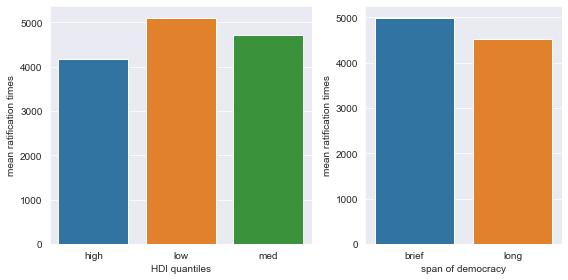

In [6]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.barplot(x=by_hdi.index,y=by_hdi.mrt, ax=axs[0])
axs[0].set(xlabel='HDI quantiles', ylabel='mean ratification times')
sns.barplot(x=by_year.index,y=by_year.mrt, ax = axs[1])
axs[1].set(xlabel='span of democracy', ylabel='mean ratification times')
f.tight_layout()

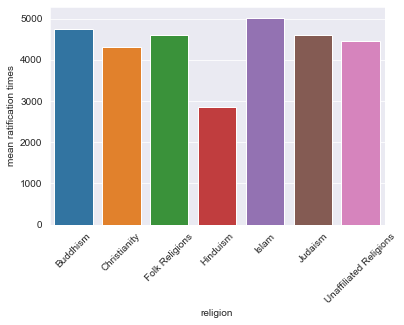

In [7]:
# Hinduism appears impactful...
bar = sns.barplot(x=by_rel.index,y=by_rel.mrt,orient='v')
bar.set(xlabel='religion', ylabel='mean ratification times')
bar.set_xticklabels(by_rel.index, fontsize=10, rotation=45);

In [8]:
# With only 3 countries, hindusim does not provide good information on state behavior
df['religion'].value_counts()


Christianity              122
Islam                      44
Buddhism                    8
Unaffiliated Religions      5
Hinduism                    3
Judaism                     1
Folk Religions              1
Name: religion, dtype: int64

## ANOVA

We can use ANOVA to provide a numerical test to what seems obviously true on visual inspection. However we find no significant reuslts.

In [9]:
# No significant results on agregates

lm = ols("mrt ~ religion", data=df).fit()
table = sm.stats.anova_lm(lm, typ=1) 
print(table)

lm = ols("mrt ~ yq", data=df).fit()
table = sm.stats.anova_lm(lm, typ=1) 
print(table)

lm = ols("mrt ~ hdiq", data=df).fit()
table = sm.stats.anova_lm(lm, typ=1) 
print(table)

             df        sum_sq       mean_sq         F    PR(>F)
religion    6.0  2.496719e+07  4.161198e+06  0.759537  0.602667
Residual  177.0  9.697113e+08  5.478595e+06       NaN       NaN
             df        sum_sq       mean_sq         F    PR(>F)
yq          1.0  6.660361e+06  6.660361e+06  1.204092  0.274444
Residual  136.0  7.522754e+08  5.531437e+06       NaN       NaN
             df        sum_sq       mean_sq         F    PR(>F)
hdiq        2.0  1.983541e+07  9.917704e+06  1.812576  0.167183
Residual  135.0  7.386670e+08  5.471607e+06       NaN       NaN


## Reformulated  hypothesis - treaty specific effects

Maybe the problem is the mean ratification times. Maybe there are some treaty specific effects. We shall look at the women's convention and the torture convention, which have a more jagged pattern of ratifications (we should skip the CRC or ICERD that are almost universally ratified). 

H: (h1) Religion (as a proxy for culture), (h2) years of democracy and (h3) HDI impact:
* a) The speed of ratification of CAT / CEDAW measured in days counted from the opening of the treaty
* b) Likelyhood of ratification of CAT / CEDAW

## EDA

Things look a bit better here. Span of democracy and religion (Islam) appear impactful for CEDAW, and span also impactful for CAT

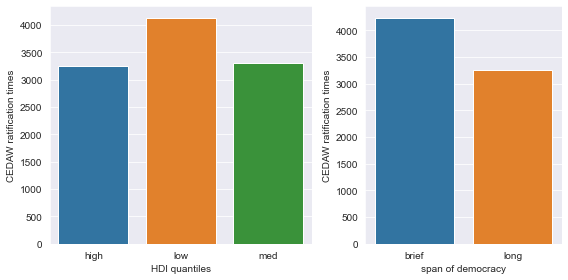

In [10]:
# Span of democracy appears impactful
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.barplot(x=by_hdi.index,y=by_hdi.d_diff_cedaw, ax=axs[0])
axs[0].set(xlabel='HDI quantiles', ylabel='CEDAW ratification times')
sns.barplot(x=by_year.index,y=by_year.d_diff_cedaw, ax = axs[1])
axs[1].set(xlabel='span of democracy', ylabel='CEDAW ratification times')
f.tight_layout()

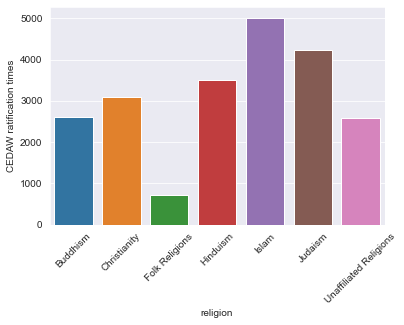

In [11]:
# A notable difference with Islam
bar = sns.barplot(x=by_rel.index,y=by_rel.d_diff_cedaw,orient='v')
bar.set(xlabel='religion', ylabel='CEDAW ratification times')
bar.set_xticklabels(by_rel.index, fontsize=10, rotation=45);

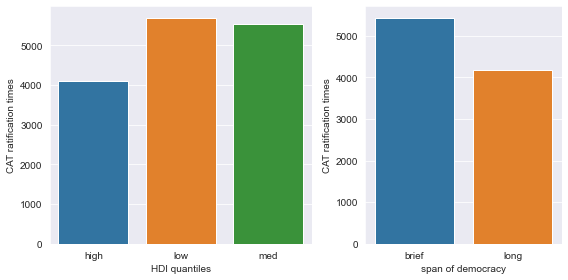

In [12]:
# Span of democracy appears impactful
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.barplot(x=by_hdi.index,y=by_hdi.d_diff_cat, ax=axs[0])
axs[0].set(xlabel='HDI quantiles', ylabel='CAT ratification times')
sns.barplot(x=by_year.index,y=by_year.d_diff_cat, ax = axs[1])
axs[1].set(xlabel='span of democracy', ylabel='CAT ratification times')
f.tight_layout()

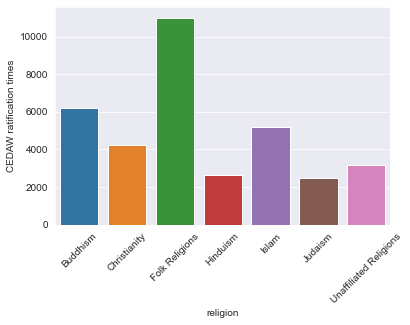

In [13]:
# A notable difference with Islam
bar = sns.barplot(x=by_rel.index,y=by_rel.d_diff_cat,orient='v')
bar.set(xlabel='religion', ylabel='CEDAW ratification times')
bar.set_xticklabels(by_rel.index, fontsize=10, rotation=45);

## ANOVA part 2

In [14]:
# Testing span of democracy for CAT. Ok significance.

lm = ols("d_diff_cat ~ yq", data=df).fit()
table = sm.stats.anova_lm(lm, typ=1) 
table



,df,sum_sq,mean_sq,F,PR(>F)
yq,1.0,4.509624e+07,4.509624e+07,3.717905,0.056156
Residual,122.0,1.479796e+09,1.212948e+07,NaN,NaN


In [15]:
# ANOVA CEDAW ~ religion, strong significance

lm = ols("d_diff_cedaw ~ religion", data=df).fit()
table = sm.stats.anova_lm(lm, typ=1) 
table

,df,sum_sq,mean_sq,F,PR(>F)
religion,6.0,1.363390e+08,2.272316e+07,3.398742,0.003408
Residual,172.0,1.149950e+09,6.685757e+06,NaN,NaN


In [16]:
# ANOVA CEDAW span of democracy, ok significance

lm = ols("d_diff_cedaw ~ yq", data=df).fit()
table = sm.stats.anova_lm(lm, typ=1) 
table


,df,sum_sq,mean_sq,F,PR(>F)
yq,1.0,2.917035e+07,2.917035e+07,3.681485,0.057179
Residual,132.0,1.045906e+09,7.923527e+06,NaN,NaN


In [17]:
# Does HDI have the same effect on CEDAW? It does not

lm = ols("d_diff_cedaw ~ hdiq", data=df).fit()
table = sm.stats.anova_lm(lm, typ=1) 
table


,df,sum_sq,mean_sq,F,PR(>F)
hdiq,2.0,2.188242e+07,1.094121e+07,1.456495,0.2368
Residual,131.0,9.840739e+08,7.512015e+06,NaN,NaN


In [18]:
# Does HDI have the same effect on CAT? It does not

lm = ols("d_diff_cedaw ~ hdiq", data=df).fit()
table = sm.stats.anova_lm(lm, typ=1) 
table

,df,sum_sq,mean_sq,F,PR(>F)
hdiq,2.0,2.188242e+07,1.094121e+07,1.456495,0.2368
Residual,131.0,9.840739e+08,7.512015e+06,NaN,NaN


## Interim conclusion

So far we do get a minor ratification of the commonsense idea that at least for these treaties these institutional factors matter.

# Part B
But does it affect ratification likelyhoods?

## Visual EDA

In [19]:
by_hdi

,d_diff_iccpr,d_diff_icescr,d_diff_icerd,d_diff_cat,d_diff_cedaw,d_diff_crc,d_diff_crpd,d_diff_cped,d_diff_icrmw,bin_cat,...,bin_icescr,bin_cedaw,bin_crc,bin_icrmw,bin_cped,bin_crpd,bin_icerd,hdi_mean,years_d,mrt
hdiq,,,,,,,,,,,,,,,,,,,,,
high,7022.500000,7329.585366,6502.704545,4107.157895,3246.431818,1082.586957,1756.022222,2071.900000,4710.071429,0.826087,...,0.891304,0.956522,1.0,0.304348,0.434783,0.978261,0.956522,0.736092,18.739130,4179.978511
low,8555.166667,8632.186047,5537.295455,5693.230769,4134.600000,866.478261,1698.000000,2373.357143,6721.250000,0.847826,...,0.934783,0.978261,1.0,0.347826,0.304348,0.913043,0.956522,0.439030,5.456522,5105.223033
med,8525.487805,8187.794872,6471.804878,5527.121951,3314.755556,961.978261,1226.435897,1748.909091,4977.000000,0.891304,...,0.847826,0.978261,1.0,0.500000,0.239130,0.847826,0.891304,0.625254,16.869565,4711.511896


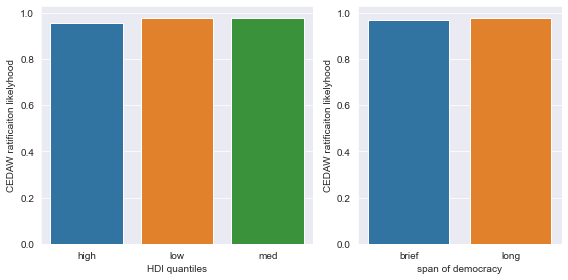

In [20]:
# CEDAW No difference! 
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.barplot(x=by_hdi.index,y=by_hdi.bin_cedaw, ax=axs[0])
axs[0].set(xlabel='HDI quantiles', ylabel='CEDAW ratificaiton likelyhood')
sns.barplot(x=by_year.index,y=by_year.bin_cedaw, ax = axs[1])
axs[1].set(xlabel='span of democracy', ylabel='CEDAW ratificaiton likelyhood')
f.tight_layout()

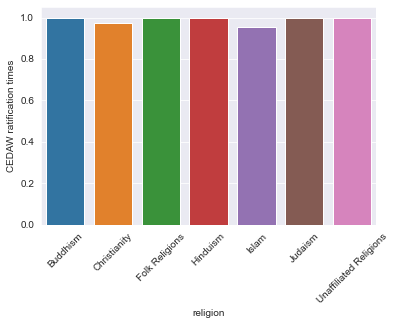

In [21]:
# CEDAW No difference!
bar = sns.barplot(x=by_rel.index,y=by_rel.bin_cedaw,orient='v')
bar.set(xlabel='religion', ylabel='CEDAW ratification times')
bar.set_xticklabels(by_rel.index, fontsize=10, rotation=45);

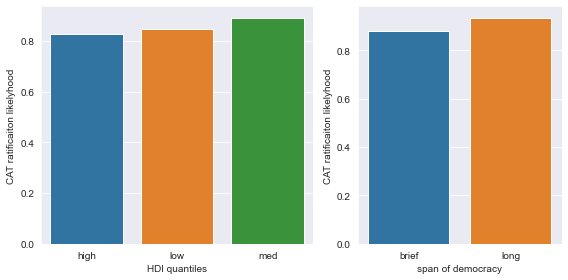

In [22]:
# CAT: Virtually no difference. We can explore the effect of span on ratificaiton likelyhood of CAT.
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.barplot(x=by_hdi.index,y=by_hdi.bin_cat, ax=axs[0])
axs[0].set(xlabel='HDI quantiles', ylabel='CAT ratificaiton likelyhood')
sns.barplot(x=by_year.index,y=by_year.bin_cat, ax = axs[1])
axs[1].set(xlabel='span of democracy', ylabel='CAT ratificaiton likelyhood')
f.tight_layout()

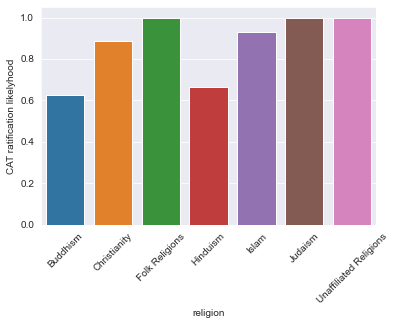

In [27]:
# CAT
bar = sns.barplot(x=by_rel.index,y=by_rel.bin_cat,orient='v')
bar.set(xlabel='religion', ylabel='CAT ratification likelyhood')
bar.set_xticklabels(by_rel.index, fontsize=10, rotation=45);

# Logit testing 
Testing possible relationships on binary dependent variable with logit

In [25]:
# Here I use the unbinned count of years of uinterrupted democracy. Weak results? Maybe I am not using the model correctly 
#(see lm below)

logit_cat_span = logit("bin_cat ~ years_d", data=df).fit()
logit_cat_span.summary()


Optimization terminated successfully.
         Current function value: 0.353160
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                bin_cat   No. Observations:                  184
Model:                          Logit   Df Residuals:                      182
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Feb 2021   Pseudo R-squ.:                0.005364
Time:                        10:20:35   Log-Likelihood:                -64.982
converged:                       True   LL-Null:                       -65.332
Covariance Type:            nonrobust   LLR p-value:                    0.4025
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9102      0.281      6.795      0.000       1.359       2.461
years_d        0.0060      0.008      0.780      0.435      -0.009       0.021
==============================================================================
"""

In [26]:
# Some significant vales. Algorithim failed to converge. Probably is not an issue here
logit_cat_rel = logit("bin_cat ~ religion", data=df).fit()
logit_cat_rel.summary()

         Current function value: 0.334933
         Iterations: 35


C:\Users\gusta\.conda\envs\gus_1\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                bin_cat   No. Observations:                  184
Model:                          Logit   Df Residuals:                      177
Method:                           MLE   Df Model:                            6
Date:                Tue, 16 Feb 2021   Pseudo R-squ.:                 0.05670
Time:                        10:20:48   Log-Likelihood:                -61.628
converged:                      False   LL-Null:                       -65.332
Covariance Type:            nonrobust   LLR p-value:                    0.2847
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.5108      0.730      0.699      0.484      -0.921       1.942
religion[T.Christianity]               1.5322      0.784      1.955      0.051      -0.004       3.068
religion[T.Folk Religions]            22.9542   1.25e+05      0.000      1.000   -2.44e+05    2.44e+05
religion[T.Hinduism]                   0.1823      1.426      0.128      0.898      -2.612       2.977
religion[T.Islam]                      2.1041      0.944      2.229      0.026       0.254       3.954
religion[T.Judaism]                   22.9542   1.25e+05      0.000      1.000   -2.44e+05    2.44e+05
religion[T.Unaffiliated Religions]    20.1326   1.36e+04      0.001      0.999   -2.66e+04    2.67e+04
======================================================================================================
"""

## Interim conclusion 2

Ratificaiton is much more insensitive to instituitonal factors than ratification times. 
Islam and Christianity have prima facie effects on CAT ratification (no control variables whatsoever). 
A linear regression on ratification times by year of democracy gives a nice line with small errors.

C:\Users\gusta\.conda\envs\gus_2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='d_diff_cat', ylabel='years_d'>

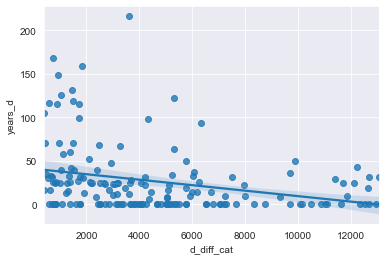

In [34]:
sns.regplot('d_diff_cat','years_d',data=df)

## Exploratory decision tree
There is a good reason to try to fit a tree model to the data. Tree models should work ok with low value counts and a lot of categorical data. I managed to break my sklearn plot tree, so I have tried CatBoost. I havent' managed to make the tree human readable.

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
df.religion.value_counts()
from catboost import CatBoostClassifier, Pool

In [31]:
enc = OneHotEncoder()
X = enc.fit_transform(df[['religion']])
y = df['bin_cat']

In [36]:
model = CatBoostClassifier(iterations=1,
                           depth=5,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True,
                           one_hot_max_size=(8))

0:	learn: 0.3871149	total: 630us	remaining: 0us


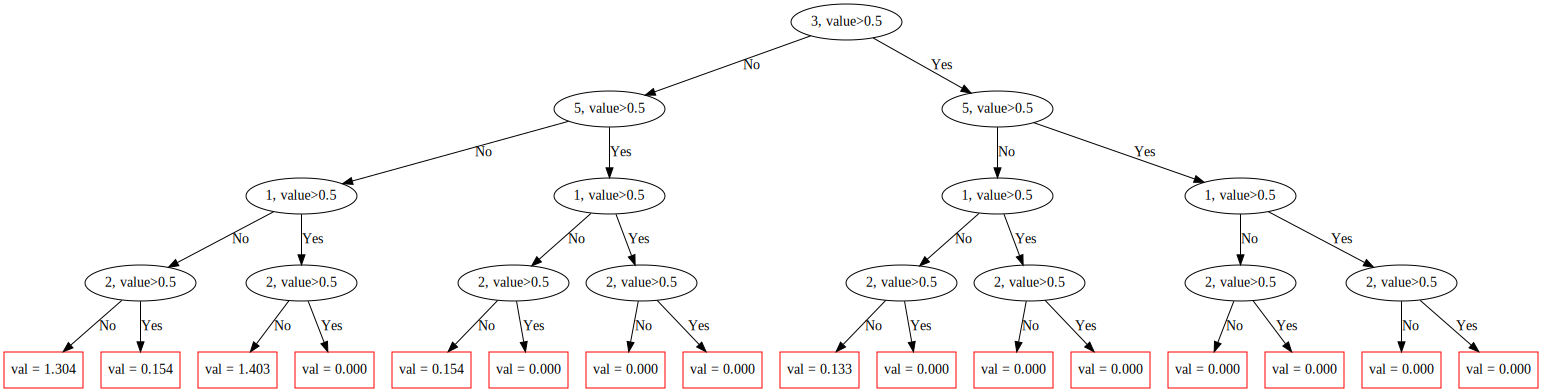

In [38]:

model.fit(X,y)
model.plot_tree(tree_idx=0, pool=None)